In [1]:
using JuMP

In [2]:
using PyPlot

## Generate data
Create some random values $x$ between 0 and 1, and then threshold them to create the correct outputs $y$. 

In [32]:
num_values = 10_000
x = rand(num_values,1)
true_threshold = 0.5
y = x .* (x .>= true_threshold)

10000x1 Array{Float64,2}:
 0.0     
 0.879459
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.799867
 0.0     
 0.0     
 0.564203
 0.0     
 0.902752
 ⋮       
 0.635517
 0.644844
 0.846444
 0.0     
 0.0     
 0.659295
 0.0     
 0.0     
 0.0     
 0.0     
 0.531815
 0.816825

## Set up the optimization
We'll search over polynomials of degree max_degree to find a good thresholding function. 

In [43]:
max_degree = 9
monomial_values = hcat([x .^ i for i = 0:max_degree]...)

m = Model()
@defVar(m, alpha[1:max_degree+1])
@defVar(m, yhat[1:num_values])
for j in 1:num_values
    @addConstraint(m, monomial_values[j,:] * alpha .== yhat[j])
end
@setObjective(m, Min, sum{(yhat[j] - y[j])^2, j=1:num_values})

:Min

## Solve it

In [44]:
@time status = solve(m)

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Optimize a model with 10000 rows, 10010 columns and 109223 nonzeros
Model has 10000 quadratic objective terms
Coefficient statistics:
  Matrix range    [1e-13, 1e+00]
  Objective range [1e+00, 2e+00]
  Bounds range    [0e+00, 0e+00]
  RHS range       [0e+00, 0e+00]
Presolve time: 0.03s
Presolved: 10000 rows, 10010 columns, 109223 nonzeros
Presolved model has 10000 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Dense cols : 10
 Free vars  : 10010
 AA' NZ     : 9.922e+04
 Factor NZ  : 1.093e+05 (roughly 10 MBytes of memory)
 Factor Ops : 1.196e+06 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   0.00000000e+00  0.00000000e+00  0.00e+00 1.00e+00  0.00e+00     0s
   1  -2.85098076e+03 -2.85104194e+03  1.81e-11 1.01e-06  0.00e+00     0s
   2  -2.85098088e+03 

:Optimal

0.132871 seconds (155.10 k allocations: 12.910 MB)


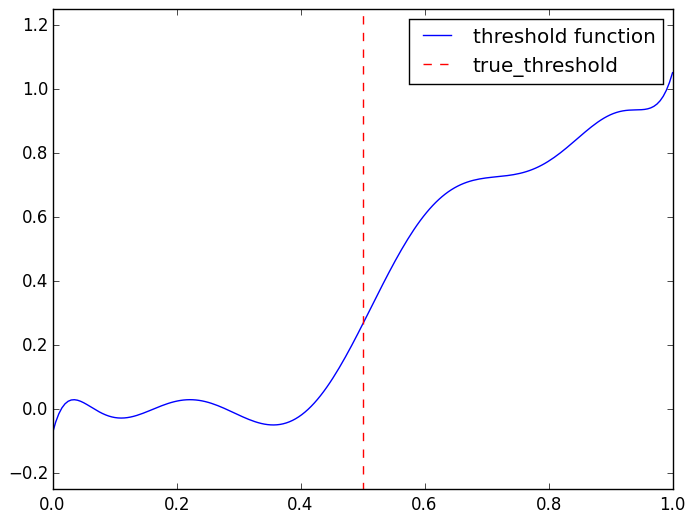

PyObject <matplotlib.legend.Legend object at 0x328d251d0>

In [45]:
num_samples = 200
xx = linspace(0, 1, num_samples)
yy= zeros(num_samples)
for j = 1:num_samples
    for k = 1:length(alpha)
        yy[j] += getValue(alpha[k]) * xx[j] ^ (k - 1)
    end
end
plot(xx, yy)
hold(true)
plot([true_threshold, true_threshold], [-2, 2], "r--")
ylim([-0.25, 1.25])
legend(["threshold function", "true_threshold"])